In [2]:
import pandas
import settings
import helpers
import random
import os
import glob
import ntpath
import math
import numpy

In [3]:
# Output from Scanner
O_dir = settings.BASE_DIR_SSD + "extracted/luna16_nodule_predictions_CNN/predictions10_luna16_fs/"

In [5]:
Result=[]
threshold=0.05

for patient_index, csv_file in enumerate(glob.glob(O_dir + "*.csv")):
    
    patient_id = ntpath.basename(csv_file).replace(".csv", "") 
    
    patient_img =helpers.load_patient_images(patient_id, settings.LUNA16_EXTRACTED_IMAGE_DIR, "*_i.png", [])
    
    #读取该病人的Output数据
    df_O = pandas.read_csv(csv_file)
    
    #寻找与当前病人匹配的True Positive文件
    T_dir = settings.LUNA16_EXTRACTED_IMAGE_DIR + "_labels/"
    df_T=[]
    
    for patient_index, csv_file in enumerate(glob.glob(T_dir + "*_annos_pos_lidc.csv")):
        
        patient_id_T = ntpath.basename(csv_file).replace("_annos_pos_lidc.csv", "") 
        
        if patient_id_T == patient_id:
            
            df_T=pandas.read_csv(csv_file)
        
            break
    
    #如果该病人没有positive则跳过
    if df_T.empty==True:
      
        continue
    
    if df_O.empty==True:
        
        continue

    #统计
    for index_T, row_T in df_T.iterrows():
        
        count=0
    
        for index_O, row_O in df_O.iterrows():
            
            d = calculateD(row_O,row_T)
            
            if d<threshold:
                count+=1
        a=count
        b=row_T["diameter"]*patient_img.shape[1]
        c=[a,b]
        Result.append(c)
    
    print(len(Result))

2
3
7
8
9
10
11
12
14
15
16
17
23
24
25
27
28
29
31
34
36
44
47
48
51
54
56
57
62
65
67
68
69
70
71
72
74
76
77
83
85
86
87
90
95
98
99
101
102
103
104
106
108
110
111
112
116
117
118
120
122
123
125
127
129
133
134
135
137
139
140
141
144
145
146
149
150
151
152
155
158
159
162
163
164
166
167
168
170
172
174
180
181
182
184
185
186
190
195
196
198
199
200
203
209
212
213
214
217
222
224
225
226
227
228
229
230
232
234
235
236
237
238
243
247
254
256
259
261
262
263
265
267
270
276
277
278
279
280
281
283
295
297
298
300
301
302
303
304
305
306
309
311
312
313
315
317
321
323
324
325
327
329
334
336
337
341
343
345
346
350
351
353
355
356
357
362
363
364
365
366
367
369
370
371
380
381
382
387
388
391
393
394
395
396
398
400
401
403
404
413
417
418
419
420
422
427
428
429
431
434
437
438
440
441
443
446
447
450
451
453
456
457
460
466
467
473
474
476
478
482
485
486
488
490
492
493
502
504
506
507
509
511
515
518
522
524
525
526
528
529
530
533
534
535
536
539
540
545
548
550
552
553


In [4]:
def calculateD(data1,data2):
     
    d = (data1["coord_x"]-data2["coord_x"])**2 + (data1["coord_y"]-data2["coord_y"])**2 +(data1["coord_z"]-data2["coord_z"])**2  
    d = math.sqrt(d)
    
    return d

In [6]:
Result2=numpy.array(Result)

In [7]:
x=Result2[:,0]

In [8]:
y=Result2[:,1]

In [9]:
import matplotlib.pyplot as plt

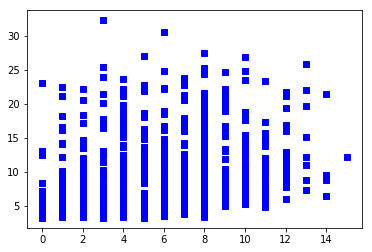

In [10]:
plt.plot(x, y, "bs")

In [11]:
x

array([6., 4., 4., ..., 4., 8., 7.])

15.0
0.0
0.894242568929792


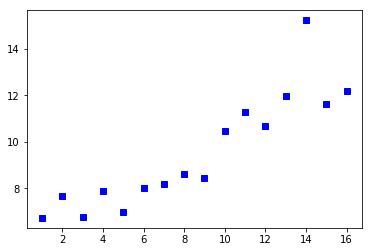

In [61]:
print( max(x) )
print( min(x) )
fre=numpy.zeros([16,1])
amo=numpy.zeros([16,1])

for i in range( len(x) ):
     
    temp=int(x[i])
    fre[temp]+=1
    amo[temp]+=y[i]
    
#print(fre)
#print(amo)
#print(amo/fre)

x_axis=list(range(1,int(max(x)-min(x))+2 ) )

plt.plot(x_axis, amo/fre, "bs")

s1=x_axis
s2=(amo/fre)[:,0]

s1=pandas.Series(s1) #转为series类型
s2=pandas.Series(s2)

corr=s1.corr(s2) #计算相关系数
print(corr)